In [152]:
"""
transactions.ipynb

Goal with this notebook is to extend the analysis of blocks.ipynb
to transactions within each block for more detail.
"""

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import typing as tp

from ape import accounts, chain, Contract, networks
from pathlib import Path
from scipy import stats

In [3]:
# SEE: https://gist.github.com/banteg/dcf6082ff7fc6ad51ce220146f29d9ff
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [4]:
# look at the current block
current_block = chain.blocks[-1]
current_block

Block(num_transactions=135, hash=HexBytes('0xaadba60e31c2cb707d8b3dd5e9822f4b8252e7885b7b100b090af39987383ed8'), number=15828988, parent_hash=HexBytes('0x7074ab996fde44d9880377998cd3908a1725346930322f2c182320b940cfd408'), size=83715, timestamp=1666748027, gas_limit=30000000, gas_used=15535646, base_fee=9305638331, difficulty=0, total_difficulty=58750003716598352816469)

In [5]:
# some relevant numbers
start_block_number = 15338009 # ~ 1 month before merge
merge_block_number = 15537394
current_block_number = current_block.number

In [6]:
# load EL blocks from csv if already queried, else do the query and save in csv
# SEE: blocks.ipynb
def load_blocks(fp: str) -> pd.DataFrame:
    if os.path.exists(fp):
        return pd.read_csv(fp)
    else:
        qb = chain.blocks.query('*', start_block=start_block_number)
        qb.to_csv(fp, index=False)
        return qb

In [7]:
# get blocks over last 2 months (since mid Aug to mid October)
# NOTE: query takes around ~15h if not from csv
%time qb = load_blocks('./data/blocks.csv')

CPU times: user 901 ms, sys: 70.3 ms, total: 971 ms
Wall time: 1.01 s


In [8]:
qb

,num_transactions,hash,number,parent_hash,size,timestamp,gas_limit,gas_used,base_fee,difficulty,total_difficulty
0,97,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009,b'm\xb0\x02|\xa9}\x84\xa3\xdd\xc1\x84\xb6\xe4\...,39308,1660456780,30000000,9954560,8122412901,12045723921070914,56321843715293942409414
1,305,b'\xdb\x91:\xfc8Qk\xc1c\x82\xe2\xdbA\xe9b#R\xe...,15338010,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",99210,1660456787,30000000,22464133,7780903344,12051743061157721,56321855767037003567135
2,51,b'\xb0\x0c2\x7f$\xc0\xec$i\xbf\xd9\xcb\x13\x0c...,15338011,b'\xdb\x91:\xfc8Qk\xc1c\x82\xe2\xdbA\xe9b#R\xe...,13806,1660456811,30000000,3781159,8264884155,12045995859944613,56321867813032863511748
3,24,"b""0\xbc\xf0\xa6\x89\xf1w\x1d\x9d\x05\x1c\xc8\x...",15338012,b'\xb0\x0c2\x7f$\xc0\xec$i\xbf\xd9\xcb\x13\x0c...,7824,1660456814,29970705,1551283,7492197312,12057896966730061,56321879870929830241809
4,63,b'`/\xd0\xe0\x7fvc>\x94\xf2\xd1\xca\xbf\x11\x9...,15338013,"b""0\xbc\xf0\xa6\x89\xf1w\x1d\x9d\x05\x1c\xc8\x...",16003,1660456819,29941438,3174533,6652621642,12063922050686819,56321891934851880928628
...,...,...,...,...,...,...,...,...,...,...,...
416045,189,b'\xecP\xf7g\x08\xc2\x19\x12_\x0c\xd8X\x92\x9b...,15754054,b'\x12Y[\x91y.\xb8\xcf\xd7\xca\xb5\x81\x87\x82...,82178,1665843383,30000000,18028304,14001417244,0,58750003716598352816469
416046,253,b'n\xf2R{ \xa9t\xabUD\xbc\x8e\x04B\x87\xb3\t\x...,15754055,b'\xecP\xf7g\x08\xc2\x19\x12_\x0c\xd8X\x92\x9b...,159816,1665843395,30000000,29936690,14354755142,0,58750003716598352816469
416047,137,b'\xb7\x06\xba9s\x7f>p\xd1\xa3\x16\xb0)Y\n\xd4...,15754056,b'n\xf2R{ \xa9t\xabUD\xbc\x8e\x04B\x87\xb3\t\x...,71368,1665843407,30000000,14425421,16141526205,0,58750003716598352816469
416048,117,b'\x86\xd9n\xfb+\x9e\n\xbc\xb3\x99\x155@\xbb\x...,15754057,b'\xb7\x06\xba9s\x7f>p\xd1\xa3\x16\xb0)Y\n\xd4...,56671,1665843419,30000000,11198548,16064238022,0,58750003716598352816469


In [9]:
from functools import partial
from hexbytes import HexBytes
from typing import List

from ape.api.providers import BlockAPI, TransactionAPI
from ape.api.query import BlockTransactionQuery, extract_fields, validate_and_expand_columns

# for each block in blocks query, query for transactions
def transaction_container_query(block, *columns: List[str]) -> pd.DataFrame:
    """
    Implements what could be a transaction "container" query analogous
    to https://github.com/ApeWorX/ape/blob/main/src/ape/managers/chain.py#L94
    but for transactions.
    """
    # perform BlockTransactionQuery
    # SEE: https://github.com/ApeWorX/ape/blob/main/src/ape/api/providers.py#L92
    query = BlockTransactionQuery(columns=columns, block_id=int(block.number))
    transactions = chain.query_manager.query(query) # use chain here so block can be row in pd.DataFrame
    
    # put into a dataframe and return
    columns = validate_and_expand_columns(columns, TransactionAPI) # NOTE: this might not include all fields we want!
    transactions = map(partial(extract_fields, columns=columns), transactions)
    df = pd.DataFrame(columns=columns, data=transactions)
    
    # add in columns for block number and block hash then return
    df['block_hash'] = [ block.hash for i in range(len(df)) ]
    df['block_number'] = [ block.number for i in range(len(df)) ]
    return df

In [10]:
# :) works
print('qb.iloc[0]', qb.iloc[0])
transaction_container_query(qb.iloc[0], '*')

qb.iloc[0] num_transactions                                                   97
hash                b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...
number                                                       15338009
parent_hash         b'm\xb0\x02|\xa9}\x84\xa3\xdd\xc1\x84\xb6\xe4\...
size                                                            39308
timestamp                                                  1660456780
gas_limit                                                    30000000
gas_used                                                      9954560
base_fee                                                   8122412901
difficulty                                          12045723921070914
total_difficulty                              56321843715293942409414
Name: 0, dtype: object
INFO: Cache database has not been initialized


,chain_id,receiver,sender,gas_limit,nonce,value,data,type,max_fee,max_priority_fee,required_confirmations,signature,block_hash,block_number
0,1,0x70526cc7a6d6320B44122ea9d2d07670ACcC85A1,0xa00CcE999f4cdde0230360609ed94e3b64b09EC1,290156,24042,0,b'\x00\xc1\xb6\x83\xcc\x10\x03\x0f\x00\x00\x00...,0x02,10282974732,2.500000e+09,2,<TransactionSignature v=0 r=2e7b2dff43593be420...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
1,1,0xdb7A53E6AE058E1Dcf4502341E2ADFA522E2B29F,0x8E17d7A5Eeb39E558021e0B5F75Ad60CF9a1a939,253902,4295,0,"b'\x06\x18\xd8\x03=\xfc\xadj\x00""e\xfc\xf3\x93...",0x00,0,NaN,2,<TransactionSignature v=37 r=0bf26aa00960a2738...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
2,1,0xd5FBDa4C79F38920159fE5f22DF9655FDe292d47,0x541a46FFf74cAEFD2a54B752c48b02Ba9864d51E,21000,191,69925781296602000,b'',0x02,26210890638,2.621089e+10,2,<TransactionSignature v=0 r=de2d14fc2824b99aa6...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
3,1,0xd5FBDa4C79F38920159fE5f22DF9655FDe292d47,0x541a46FFf74cAEFD2a54B752c48b02Ba9864d51E,21000,192,69943042248093000,b'',0x02,25388940567,2.538894e+10,2,<TransactionSignature v=0 r=a93837dc4bb3c0c894...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
4,1,0x1111111254fb6c44bAC0beD2854e76F90643097d,0x0e3Fbeba7c45666F2EcacEE7c60844a9C1844151,460110,73,14540000000000000000,b'|\x02R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x...,0x02,14720610463,7.500000e+09,2,<TransactionSignature v=0 r=754ff55d40bf584814...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1,0xb0d47dD82fb8FACb1Bc4bA534a836B545aD97d2B,0x39B984d1D427BD74a7713537A27530d2963B92B2,142195,120,0,b'\xa9\x05\x9c\xbb\x00\x00\x00\x00\x00\x00\x00...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=1 r=7bde3123c97e5c06c2...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
93,1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0x385d94dE0BE5F6d958B8340a8BE6F51c4D53bD87,216907,119,50000000000000000,"b""Z\xe4\x01\xdc\x00\x00\x00\x00\x00\x00\x00\x0...",0x02,8703000983,1.000000e+09,2,<TransactionSignature v=0 r=84dea5997f56e3cb49...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
94,1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,0xD72276Ef7305Be51C1FdaFCB571B274B55e98526,349912,514,20000000000000000,b'Z\xe4\x01\xdc\x00\x00\x00\x00\x00\x00\x00\x0...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=1 r=bfc5278e179af89505...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009
95,1,0x65c2e54a4c75ff6da7b6B32369c1677250075fb2,0x87619f8e63cD2F339f1EBD5144fD3fE37871c204,177495,0,7514540636130913,b'vI\xb9W\x00\x00\x00\x00\x00\x00\x00\x00\x00\...,0x02,8703000983,1.000000e+09,2,<TransactionSignature v=0 r=5991e716eeec68d5f5...,"b'\xf0\x82\x95\x1e@\xe4by\xfc,\x15\xd6\xb6xFw\...",15338009


In [11]:
# load EL transactions from csv if already queried, else do the query and save in csv
# TODO: CHUNK LOAD
def load_transactions(fp: str, compression: str, qb: pd.DataFrame, starts_from_head: bool) -> pd.DataFrame:
    if os.path.exists(fp):
        return pd.read_csv(fp, compression=compression)
    else:
        # query transactions in each block
        # use iterrows to save transactions to temp csv
        tmp_fp = str(Path(fp).parent / Path('_tmp_' + Path(fp).name))
        is_head = starts_from_head
        for _, b in qb.iterrows():
            qt = transaction_container_query(b, '*')
            
            # append to temp
            # NOTE: qt is of type pd.DataFrame
            qt.to_csv(tmp_fp, mode='a', compression=compression, index=False, header=is_head)
            if is_head:
                is_head = False
        
        # once done iterating, mv temp to output file and load
        os.rename(tmp_fp, fp)
        return pd.read_csv(fp, compression=compression)

In [ ]:
# get txs in each block over last 2 months (since mid Aug to mid October)
# TODO: fix/remove that one header that was mistakenly appended
# NOTE: query takes around (a long time) if not from csv
# last_block_appended = 15725628
# %time load_transactions('./data/transactions.csv.gz', 'gzip', qb[qb['number'] > last_block_appended], False)

In [28]:
# TODO: chunk the loading from compressed file so viewing in parts
# look at how many rows there should be in qt
print("num txs in qb (sum):", qb['num_transactions'].sum())

num txs in qb (sum): 69567381


In [29]:
# look at only about ~ 1/5 of that data around the merge?
chunk_size = int(qb['num_transactions'].sum() / 10)
start_row = int(qb['num_transactions'].sum() * 4 / 10)
end_row = int(qb['num_transactions'].sum() * 6 / 10)

print("chunk_size", chunk_size)
print("(start_row, end_row)", (start_row, end_row))

chunk_size 6956738
(start_row, end_row) (27826952, 41740428)


In [30]:
%%capture --no-display
# also, only need columns for gas analysis: ['block_number', 'receiver', 'sender', 'gas_limit', 'type', 'max_fee', 'max_priority_fee']
cols = ['block_number', 'receiver', 'sender', 'gas_limit', 'type', 'max_fee', 'max_priority_fee']

qt = pd.DataFrame(columns=cols)
with pd.read_csv('./data/transactions.csv.gz', compression='gzip', chunksize=chunk_size, usecols=cols) as reader:
    for i, chunk in enumerate(reader):
        if i >= 4 and i < 6:
            print("chunk", chunk)
            qt = pd.concat([qt, chunk])

In [32]:
qt

,block_number,receiver,sender,gas_limit,type,max_fee,max_priority_fee
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,2.055775e+10,1.841313e+09
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,8.952896e+10,1.800000e+09
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,1.209108e+10,3.000000e+09
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,1.820000e+10,1.660000e+09
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,1.820000e+10,1.660000e+09
...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,2.100000e+10,2.000000e+09
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,2.100000e+10,2.000000e+09
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,2.100000e+10,2.000000e+09
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,2.100000e+10,2.000000e+09


In [34]:
%%capture
# convert fees from wei to gwei
qt['max_fee_gwei'] = qt['max_fee'].astype(float) / 1e9
qt['max_priority_fee_gwei'] = qt['max_priority_fee'].astype(float) / 1e9

In [35]:
qt.drop(columns=['max_fee', 'max_priority_fee'], inplace=True)

In [53]:
%%capture
# convert fees from wei to gwei
qb['base_fee_gwei'] = qb['base_fee'].astype(float) / 1e9

In [54]:
qb.drop(columns=['base_fee'], inplace=True)

In [58]:
# join qb.timestamp, qb.base_fee into qt
qt = qt.join(qb.filter(['number', 'timestamp', 'base_fee_gwei']).rename(columns={"number": "block_number"}).set_index('block_number'), on='block_number')
qt

,block_number,receiver,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,20.557748,1.841313,1662691234,10.362594
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,89.528961,1.800000,1662691234,10.362594
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,12.091082,3.000000,1662691234,10.362594
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,18.200000,1.660000,1662691234,10.362594
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,18.200000,1.660000,1662691234,10.362594
...,...,...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,21.000000,2.000000,1663743659,8.255909
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,21.000000,2.000000,1663743659,8.255909
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,21.000000,2.000000,1663743659,8.255909
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,21.000000,2.000000,1663743659,8.255909


In [ ]:
# calculate effective gas price paid per tx
#  ... `priority_fee_per_gas = min(transaction.max_priority_fee_per_gas, transaction.max_fee_per_gas - block.base_fee_per_gas)`
#  ... `effective_gas_price = priority_fee_per_gas + block.base_fee_per_gas`
#  ... `fee_paid = gas_used * effective_gas_price`
# SEE: https://eips.ethereum.org/EIPS/eip-1559#Specification

In [91]:
qt['max_fee_less_base_gwei'] = qt['max_fee_gwei'] - qt['base_fee_gwei']
qt['priority_fee_gwei'] = np.minimum(qt['max_priority_fee_gwei'], qt['max_fee_less_base_gwei'])
qt['effective_gas_price_gwei'] = qt['priority_fee_gwei'] + qt['base_fee_gwei']

In [92]:
# have the data we need now ...
qt

,block_number,receiver,sender,gas_limit,type,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,priority_fee_gwei,effective_gas_price_gwei,max_fee_less_base_gwei
27826952,15500283,0x59CCf62B862f99B5aEd8857FBAdB7F895f6c59D5,0xF585A4aE338bC165D96E8126e8BBcAcAE725d79E,740000,0x02,20.557748,1.841313,1662691234,10.362594,1.841313,12.203908,10.195154
27826953,15500283,0x4D9079Bb4165aeb4084c526a32695dCfd2F77381,0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010,103581,0x02,89.528961,1.800000,1662691234,10.362594,1.800000,12.162594,79.166367
27826954,15500283,0x9983D8cDEAf7872501628229d311E2F7Df396aDd,0xcd4A15841a4906fF78D3F2Aa8E55936F1A7Ae4a5,243018,0x02,12.091082,3.000000,1662691234,10.362594,1.728488,12.091082,1.728488
27826955,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0xf2D77B80B0Bb3F40a174B1A46FE5Ee8ED48CFEEC,46179,0x02,18.200000,1.660000,1662691234,10.362594,1.660000,12.022594,7.837406
27826956,15500283,0xfD7c6A97ed8D42844dd163f5b3ab021202ac6802,0x0cCC8254F63Bf740cFcE73D99D11A298cE7FEBa8,46179,0x02,18.200000,1.660000,1662691234,10.362594,1.660000,12.022594,7.837406
...,...,...,...,...,...,...,...,...,...,...,...,...
41740423,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x9F90A7b2a23a7eF714d1eE0e74002fCb1e2f10df,21000,0x02,21.000000,2.000000,1663743659,8.255909,2.000000,10.255909,12.744091
41740424,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x81EF2365124A2b951f2D8B0C3e98c5b294D5dD40,21000,0x02,21.000000,2.000000,1663743659,8.255909,2.000000,10.255909,12.744091
41740425,15580183,0xA9D1e08C7793af67e9d92fe308d5697FB81d3E43,0x1EF2CbC0857938EF6653Fb0a6036328bC82a5FC1,23300,0x02,21.000000,2.000000,1663743659,8.255909,2.000000,10.255909,12.744091
41740426,15580183,0x95A9bd206aE52C4BA8EecFc93d18EACDd41C88CC,0x36f537939A111995D09d0b856dAd41875B9687Ac,21000,0x02,21.000000,2.000000,1663743659,8.255909,2.000000,10.255909,12.744091


In [76]:
# to start, look at proportion of txs that are EIP1559 in filtered dataset ...
qt_grouped_by_type = qt.groupby(by='block_number').agg({'type': lambda x: x[x == "0x02"].count() / x.count() })

In [77]:
qt_grouped_by_type['number'] = qt_grouped_by_type.index
qt_grouped_by_type

,type,number
block_number,,
15500283,0.960227,15500283
15500285,0.739003,15500285
15500287,0.925501,15500287
15500288,0.836066,15500288
15500289,0.750000,15500289
...,...,...
15580179,0.958333,15580179
15580180,0.901468,15580180
15580181,0.889474,15580181


<AxesSubplot: xlabel='number', ylabel='type'>

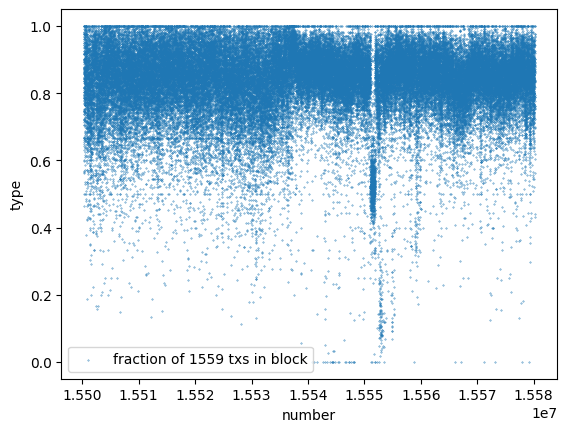

In [78]:
qt_grouped_by_type.plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block', s=0.1)

<AxesSubplot: xlabel='number', ylabel='type'>

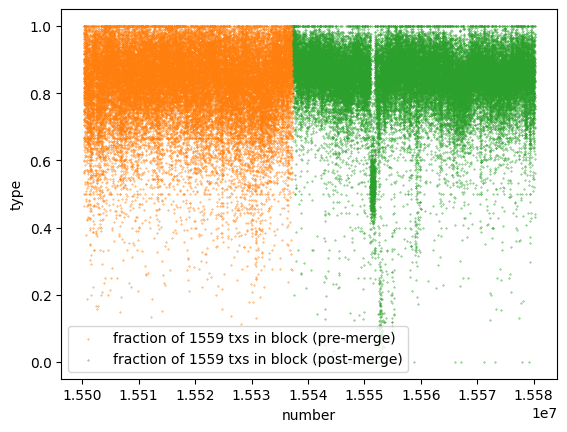

In [79]:
# change color to distinguish b/w pre vs post-merge
#  ... Q: what's that drop off in EIP1559 fraction around block_number=1.555 * 1e7?
#  ... TODO: look at distribution of EIP1559 fraction. Seems less concentrated around 1 post-merge?
ax = qt_grouped_by_type[qt_grouped_by_type['number'] < merge_block_number].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (pre-merge)', s=0.1, color='C1')
qt_grouped_by_type[qt_grouped_by_type['number'] >= merge_block_number].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (post-merge)', s=0.1, color='C2', ax=ax)

<AxesSubplot: xlabel='number', ylabel='type'>

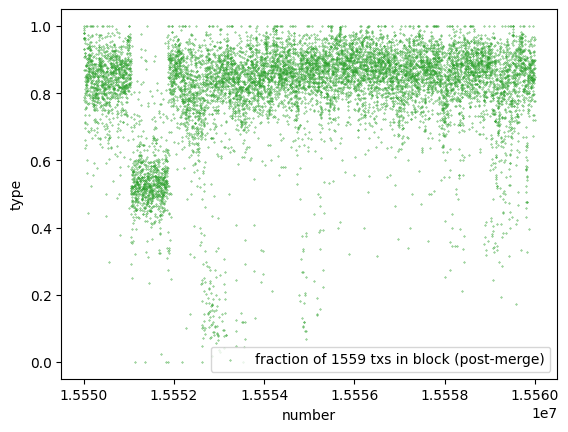

In [80]:
# zoom in post-merge around
# ... TODO: not entirely sure what's goin on there. will come back to it after distribution of EIP1559 and gas data
qt_grouped_by_type[(qt_grouped_by_type['number'] >= 1.555*1e7) & (qt_grouped_by_type['number'] < 1.556*1e7)].plot(x='number', y='type', kind='scatter', label='fraction of 1559 txs in block (post-merge)', s=0.1, color='C2')

<AxesSubplot: ylabel='Frequency'>

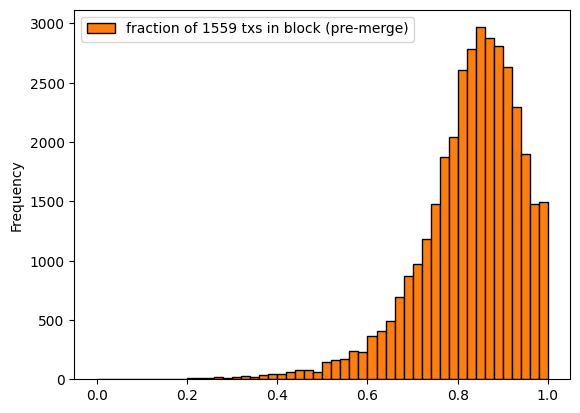

In [81]:
# distribution of 1559 txs in a block
#  ... pre-merge
qt_grouped_by_type[qt_grouped_by_type['number'] < merge_block_number].plot(y='type', kind='hist', bins=50, color='C1', edgecolor='k', label='fraction of 1559 txs in block (pre-merge)')

<AxesSubplot: ylabel='Frequency'>

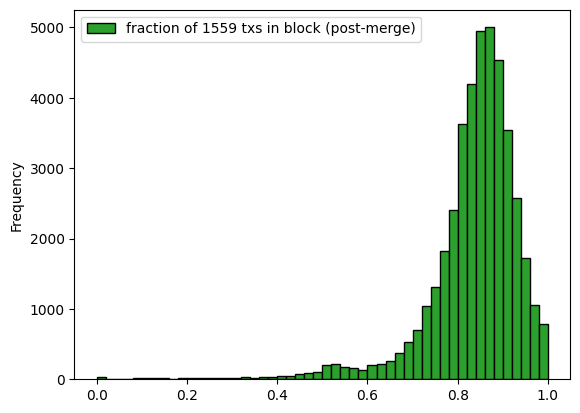

In [82]:
# distribution of 1559 txs ina block
#  ... post-merge
#  ... NOTE: noticeable reduction of 100% 1559 txs in blocks post-merge. why?
qt_grouped_by_type[qt_grouped_by_type['number'] >= merge_block_number].plot(y='type', kind='hist', bins=50, color='C2', edgecolor='k', label='fraction of 1559 txs in block (post-merge)')

In [84]:
# Look at gas in txs: priority fee, max fee
#  ... Q: is it cheaper for users to get tx included?
#  ... Q: does merge reduce tx fees post merge due to lack of variability?

# priority fee = tip needed to include for tx to go through (on top of base fee)
# max fee = max user was willing to pay

# so interesting to look at:
#  ... [ ] priority fee changes = how much more/less need to pay to miners/validators for tx to be included
#  ... [ ] max fee changes = how much more/less users are willing to pay for tx to possibly be included

In [93]:
%%capture --no-display
# start with priority fee
#  ... take averages within block
qt_group_by_block_avgs = qt.groupby(by='block_number').mean()

In [96]:
qt_group_by_block_avgs['number'] = qt_group_by_block_avgs.index

In [97]:
qt_group_by_block_avgs

,max_fee_gwei,max_priority_fee_gwei,timestamp,base_fee_gwei,priority_fee_gwei,effective_gas_price_gwei,max_fee_less_base_gwei,number
block_number,,,,,,,,
15500283,17.558501,1.624996,1.662691e+09,10.362594,1.494838,11.857432,7.195907,15500283
15500285,49.576833,8.814100,1.662691e+09,10.199984,8.243863,18.443847,39.376849,15500285
15500287,31.544860,1.901472,1.662691e+09,10.039201,1.745195,11.784397,21.505659,15500287
15500288,72.567823,1.816686,1.662691e+09,11.292988,1.816686,13.109674,61.274834,15500288
15500289,13.964421,1.453036,1.662691e+09,10.315720,1.453036,11.768755,3.648702,15500289
...,...,...,...,...,...,...,...,...
15580179,36.633434,2.390792,1.663744e+09,9.128519,2.390792,11.519310,27.504916,15580179
15580180,56.819752,3.531390,1.663744e+09,8.164188,3.431042,11.595230,48.655564,15580180
15580181,47.852809,1.908044,1.663744e+09,9.183709,1.747920,10.931628,38.669101,15580181


<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

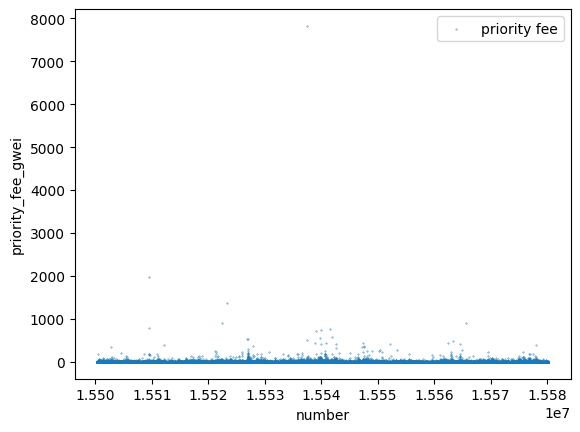

In [105]:
qt_group_by_block_avgs.plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee', s=0.1)

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

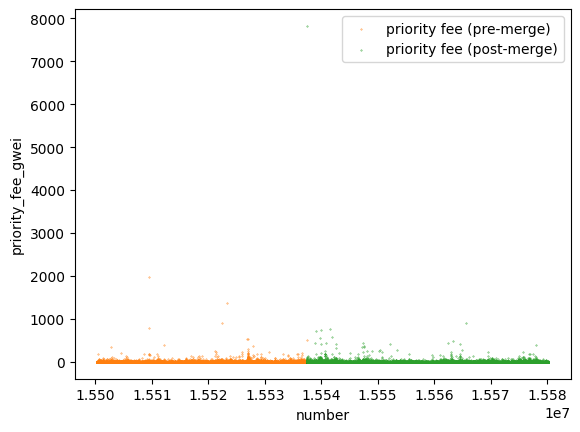

In [108]:
ax = qt_group_by_block_avgs[qt_group_by_block_avgs["number"] < merge_block_number].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee (pre-merge)', s=0.1, color='C1')
qt_group_by_block_avgs[qt_group_by_block_avgs["number"] >= merge_block_number].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee (post-merge)', s=0.1, color='C2', ax=ax)

<AxesSubplot: xlabel='number', ylabel='priority_fee_gwei'>

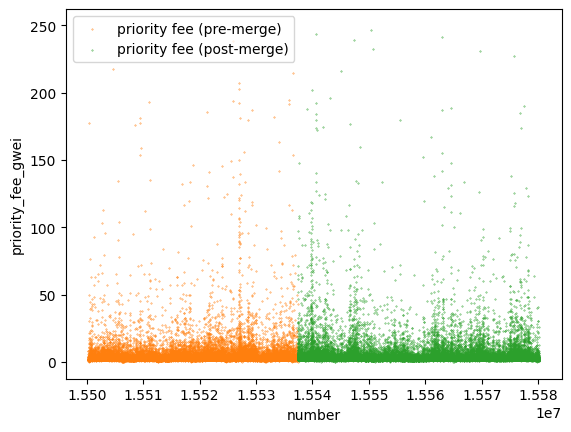

In [115]:
# ignore the extreme outliers
#  ... structure of priority fee market looks pretty similar pre v.s. post-merge
fee_filter_max = 250
ax = qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] < merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee (pre-merge)', s=0.1, color='C1')
qt_group_by_block_avgs[(qt_group_by_block_avgs["number"] >= merge_block_number) & (qt_group_by_block_avgs["priority_fee_gwei"] < fee_filter_max)].plot(x='number', y='priority_fee_gwei', kind='scatter', label='priority fee (post-merge)', s=0.1, color='C2', ax=ax)

In [ ]:
# TODO: distr for mean values, calc stdev aggregates